# Dieses Notebook ist in Julia geschrieben!

In [8]:
using Plots
gr()

Plots.GRBackend()

In [12]:
function _Newton!(x,f,∂f) 
    dx = f(x...) / ∂f(x...)
    x[1] = x[1]-dx
    return dx
    end

    
function Newton(x,f,∂f, ϵ::T,dx::T) where {T} 
     while dx > ϵ 
          dx = _Newton!(x,f,∂f)
      end
      return x[1]
  end

  function Insing(x,t,b)
    x-tanh(x/t+b)
end

function ∂Insing(x,t,b)
    1-sech(x/t+b/t)^2/t
end

function calculate_func!(calculated_value,f,∂f,variable,parameters)
    packed_parameters = Float64[1,1,parameters]
    for (i,x) ∈ enumerate(variable)
   @inbounds     packed_parameters[1]=1
   @inbounds     packed_parameters[2]=x
   @inbounds     calculated_value[i] = Newton(packed_parameters,f,∂f,10^-8,1.0)
    end
    return calculated_value
end

calculate_func! (generic function with 1 method)

In [13]:
function ploting()
    t = collect(0:0.01:3)
    output_array = similar(t)
    plot(t,calculate_func!(output_array,Insing, ∂Insing,t,0), label="b=0")
    plot!(t,calculate_func!(output_array,Insing, ∂Insing,t,0.25), label="b=0.25")
    plot!(t,calculate_func!(output_array,Insing, ∂Insing,t,0.5), label="b=0.5")
    plot!(t,calculate_func!(output_array,Insing, ∂Insing,t,0.75), label="b=0.75")
    plot!(t,calculate_func!(output_array,Insing, ∂Insing,t,1.0), label="b=1")
end


ploting (generic function with 1 method)

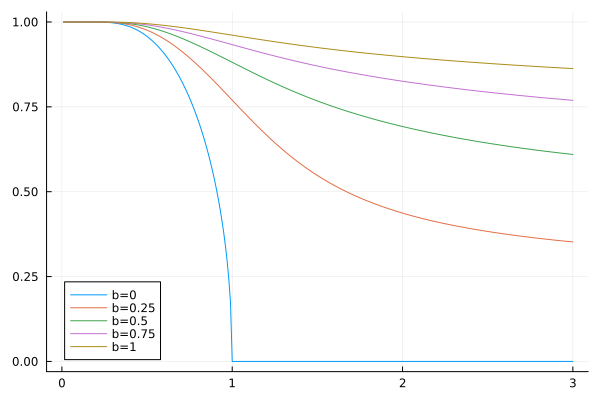

In [14]:
ploting()